<a href="https://colab.research.google.com/github/Miftahulza/PCD_QUIZ_F55122009_MIFTAHUL-ZANNAH/blob/main/MEET_PCD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [139]:
import cv2
import numpy as np
from PIL import Image
from random import randint

In [140]:
# 1. Baca gambar menggunakan OpenCV dan PIL
def read_image_opencv(file_path):
    return cv2.imread(file_path)

def read_image_pil(file_path):
    return Image.open(file_path)

In [141]:
# 2. Lakukan edge detection menggunakan Sobel dan Canny
def sobel_edge_detection(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    sobel_x = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=5)
    sobel_y = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=5)
    sobel = np.sqrt(sobel_x**2 + sobel_y**2)
    sobel = np.uint8(sobel)
    return sobel

In [142]:
def edge_detection_canny(image):
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    canny_edges = cv2.Canny(gray_image, 100, 200)
    return canny_edges

In [143]:
# 3. Lakukan cropping: random cropping dan half-size center cropping
def random_crop(image, crop_width, crop_height):
    height, width = image.shape[:2]
    x = randint(0, width - crop_width)
    y = randint(0, height - crop_height)
    return image[y:y+crop_height, x:x+crop_width]

def half_size_center_crop(image):
    height, width = image.shape[:2]
    crop_height = height // 2
    crop_width = width // 2
    start_x = (width - crop_width) // 2
    start_y = (height - crop_height) // 2
    return image[start_y:start_y+crop_height, start_x:start_x+crop_width]

In [144]:
# 4. Lakukan transformasi pada gambar: putih menjadi hitam, hitam menjadi putih
def invert_colors(image):
    return cv2.bitwise_not(image)

In [145]:
# 5. Tambahkan noise pada gambar original: salt and pepper noise dan gaussian
def add_salt_and_pepper_noise(image, amount):
    noisy_image = image.copy()
    height, width = image.shape[:2]
    num_salt = np.ceil(amount * image.size * 0.5)
    coords = [np.random.randint(0, i - 1, int(num_salt)) for i in image.shape]
    noisy_image[coords[0], coords[1], :] = 255
    num_pepper = np.ceil(amount * image.size * 0.5)
    coords = [np.random.randint(0, i - 1, int(num_pepper)) for i in image.shape]
    noisy_image[coords[0], coords[1], :] = 0
    return noisy_image

def add_gaussian_noise(image, mean=0, std=25):
    noisy_image = image.copy()
    height, width = image.shape[:2]
    noise = np.random.normal(mean, std, (height, width, 3))
    noisy_image = np.clip(noisy_image + noise, 0, 255)
    return noisy_image.astype(np.uint8)

In [146]:
# 6. Lakukan transformasi geometri: rotasi, flip vertikal, dan horizontal
def rotate_image(image, angle):
    height, width = image.shape[:2]
    rotation_matrix = cv2.getRotationMatrix2D((width/2, height/2), angle, 1)
    rotated_image = cv2.warpAffine(image, rotation_matrix, (width, height))
    return rotated_image

def flip_vertical(image):
    return cv2.flip(image, 0)

def flip_horizontal(image):
    return cv2.flip(image, 1)

In [147]:
# 6. Lakukan transformasi geometri: rotasi, flip vertikal dan horizontal
def rotate_image(image, angle):
    height, width = image.shape[:2]
    rotation_matrix = cv2.getRotationMatrix2D((width/2, height/2), angle, 1)
    rotated_image = cv2.warpAffine(image, rotation_matrix, (width, height))
    return rotated_image

def flip_vertical(image):
    flipped_image = cv2.flip(image, 0)
    return flipped_image

def flip_horizontal(image):
    flipped_image = cv2.flip(image, 1)
    return flipped_image


In [148]:
# Main program
file_path = '/content/drive/MyDrive/GAMBARPCD/f6abd377-0bc2-4951-9a3d-216daa114cbd.jpeg.jpg'
image_opencv = read_image_opencv(file_path)
image_pil = read_image_pil(file_path)

sobel_edges = sobel_edge_detection(image_opencv)
edge_detection_canny = edge_detection_canny(image_opencv)

random_cropped_image = random_crop(image_opencv, 200, 200)
half_size_center_cropped_image = half_size_center_crop(image_opencv)

inverted_image = invert_colors(image_opencv)

salt_pepper_noisy_image = add_salt_and_pepper_noise(image_opencv, 0.05)
gaussian_noisy_image = add_gaussian_noise(image_opencv)

rotated_image = rotate_image(image_opencv, 45)
vertical_flipped_image = flip_vertical(image_opencv)
horizontal_flipped_image = flip_horizontal(image_opencv)

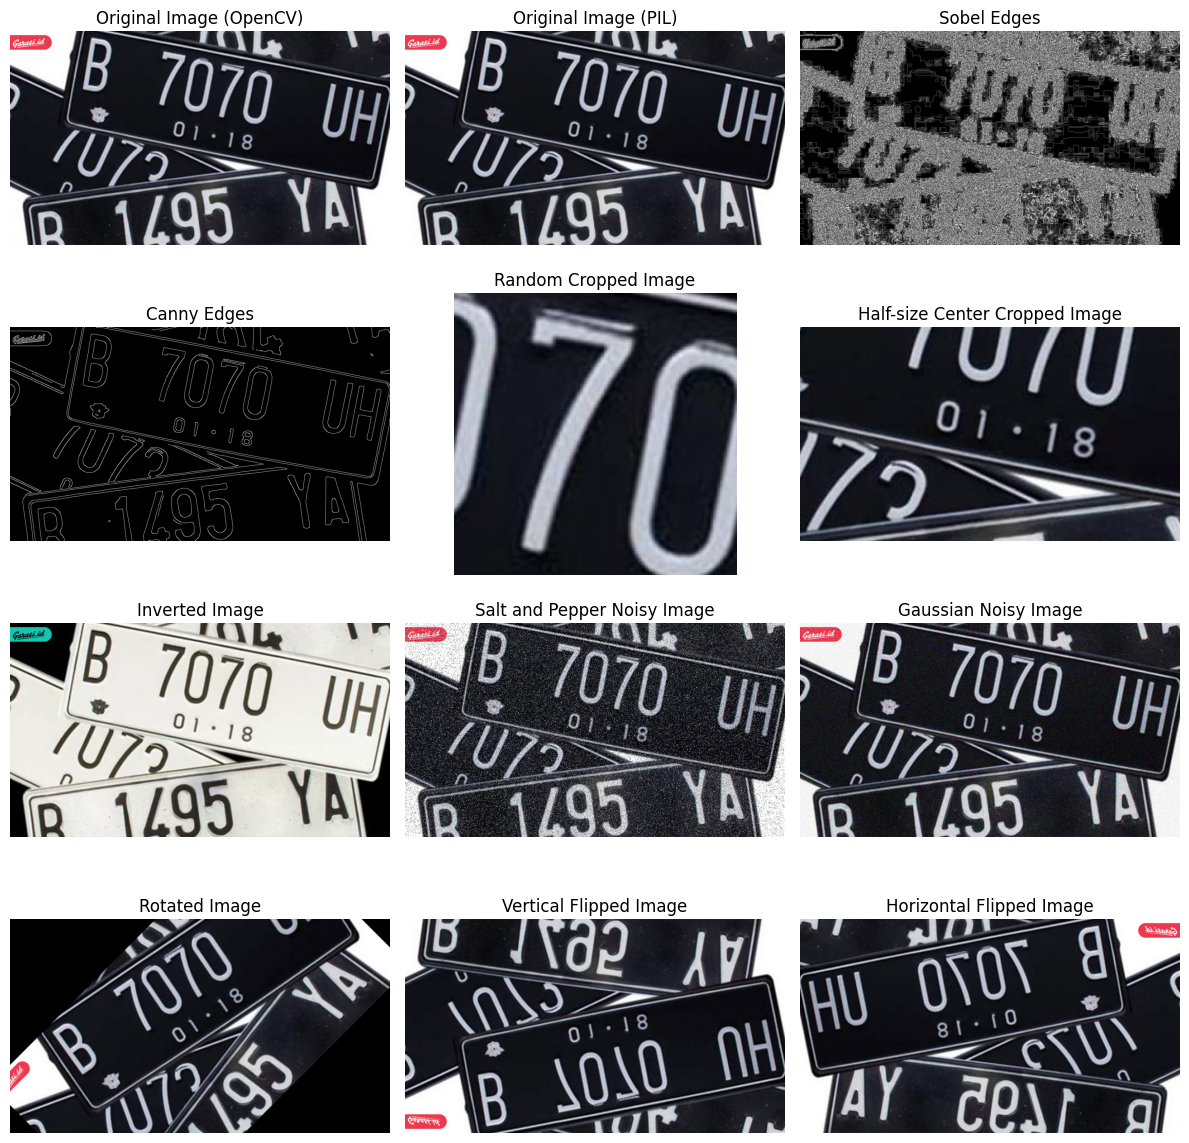

In [149]:
import matplotlib.pyplot as plt

# Setup subplot grid
fig, axs = plt.subplots(4, 3, figsize=(12, 12))

# Tampilkan gambar-gambar
axs[0, 0].imshow(image_opencv[..., ::-1])  # OpenCV image
axs[0, 0].set_title('Original Image (OpenCV)')

axs[0, 1].imshow(np.array(image_pil))  # PIL image
axs[0, 1].set_title('Original Image (PIL)')

axs[0, 2].imshow(sobel_edges, cmap='gray')  # Sobel Edges
axs[0, 2].set_title('Sobel Edges')

axs[1, 0].imshow(canny_edges, cmap='gray')  # Canny Edges
axs[1, 0].set_title('Canny Edges')

axs[1, 1].imshow(random_cropped_image[..., ::-1])  # Random Cropped Image
axs[1, 1].set_title('Random Cropped Image')

axs[1, 2].imshow(half_size_center_cropped_image[..., ::-1])  # Half-size Center Cropped Image
axs[1, 2].set_title('Half-size Center Cropped Image')

axs[2, 0].imshow(inverted_image[..., ::-1])  # Inverted Image
axs[2, 0].set_title('Inverted Image')

axs[2, 1].imshow(salt_pepper_noisy_image[..., ::-1])  # Salt and Pepper Noisy Image
axs[2, 1].set_title('Salt and Pepper Noisy Image')

axs[2, 2].imshow(gaussian_noisy_image[..., ::-1])  # Gaussian Noisy Image
axs[2, 2].set_title('Gaussian Noisy Image')

axs[3, 0].imshow(rotated_image[..., ::-1])  # Rotated Image
axs[3, 0].set_title('Rotated Image')

axs[3, 1].imshow(vertical_flipped_image[..., ::-1])  # Vertical Flipped Image
axs[3, 1].set_title('Vertical Flipped Image')

axs[3, 2].imshow(horizontal_flipped_image[..., ::-1])  # Horizontal Flipped Image
axs[3, 2].set_title('Horizontal Flipped Image')

# Hapus label sumbu
for ax in axs.flat:
    ax.axis('off')

plt.tight_layout()
plt.show()
